In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
from math import sin, cos, pi, exp, e
import cmath
from cmath import phase

In [16]:
def f_1(x):
    return 5 + 4 * cos(2 * x) + 2 * sin(3 * x) - cos(4 * x)
 
def f_2(x):
    return abs(x)
 
def f_3(x):
    if x >= -pi and x < 0:
        return -1
    else:
        if x >= 0 and x <= pi:
            return 1
        else:
            return 0

'''
Функция, которая вычисляет и возвращает комплексные
коэффициенты тригонометрического полинома, интерполирующего
узлы y_nodes, равномерно распределенные на отрезке [-pi, pi].
'''
def fft_coeff(y_nodes):
    n = len(y_nodes)
    m = int(n / 2)
    A = [0] * n
    E = [0] * m
    O = [0] * m
    for k in range(m):
        E[k] = sum([y_nodes[2 * j] * e**(-2j * j * k * pi / m) for j in range(m)])
        O[k] = sum([y_nodes[2 * j + 1] * e**(-2j * j * k * pi / m) for j in range(m)])
        A[k] = E[k] + e**(-1j * k * pi / m) * O[k]
        A[k + m] = E[k] - e**(-1j * k * pi / m) * O[k]
    a_circumflex = [A[k] * (-1)**(k) / n for k in range(n)]
    return a_circumflex
 
'''
Функция, которая вычисляет значение тригонометрического
полинома с коэффициентами coeffs в точке x.
'''
def trigonometric_interpolant(x, coeffs):
    m = int(len(coeffs) / 2)
    #S_n = sum([coeffs[k] * cmath.exp(1j * k * x) for k in range(-m, m)])
    S_n = sum([(coeffs[k].real * cos(k * x) - coeffs[k].imag * sin(k * x)) for k in range(-m, m)])
    return S_n.real

In [17]:
'''
Данные
'''
n = 8
 
'''
Вычисления
'''
vector_x = np.linspace(-pi, pi, 1000)
f_1_x = [f_1(x_i) for x_i in vector_x]
f_2_x = [f_2(x_i) for x_i in vector_x]
f_3_x = [f_3(x_i) for x_i in vector_x]

x_nodes = [-pi + i * 2 * pi / n for i in range(n)]
 
y_nodes_1 = [f_1(x) for x in x_nodes]
coeffs_1 = fft_coeff(y_nodes_1)
#print(coeffs_1)
S_1_x = [trigonometric_interpolant(x, coeffs_1) for x in vector_x]
 
y_nodes_2 = [f_2(x) for x in x_nodes]
coeffs_2 = fft_coeff(y_nodes_2)
S_2_x = [trigonometric_interpolant(x, coeffs_2) for x in vector_x]
         
y_nodes_3 = [f_3(x) for x in x_nodes]
coeffs_3 = fft_coeff(y_nodes_3)
S_3_x = [trigonometric_interpolant(x, coeffs_3) for x in vector_x]

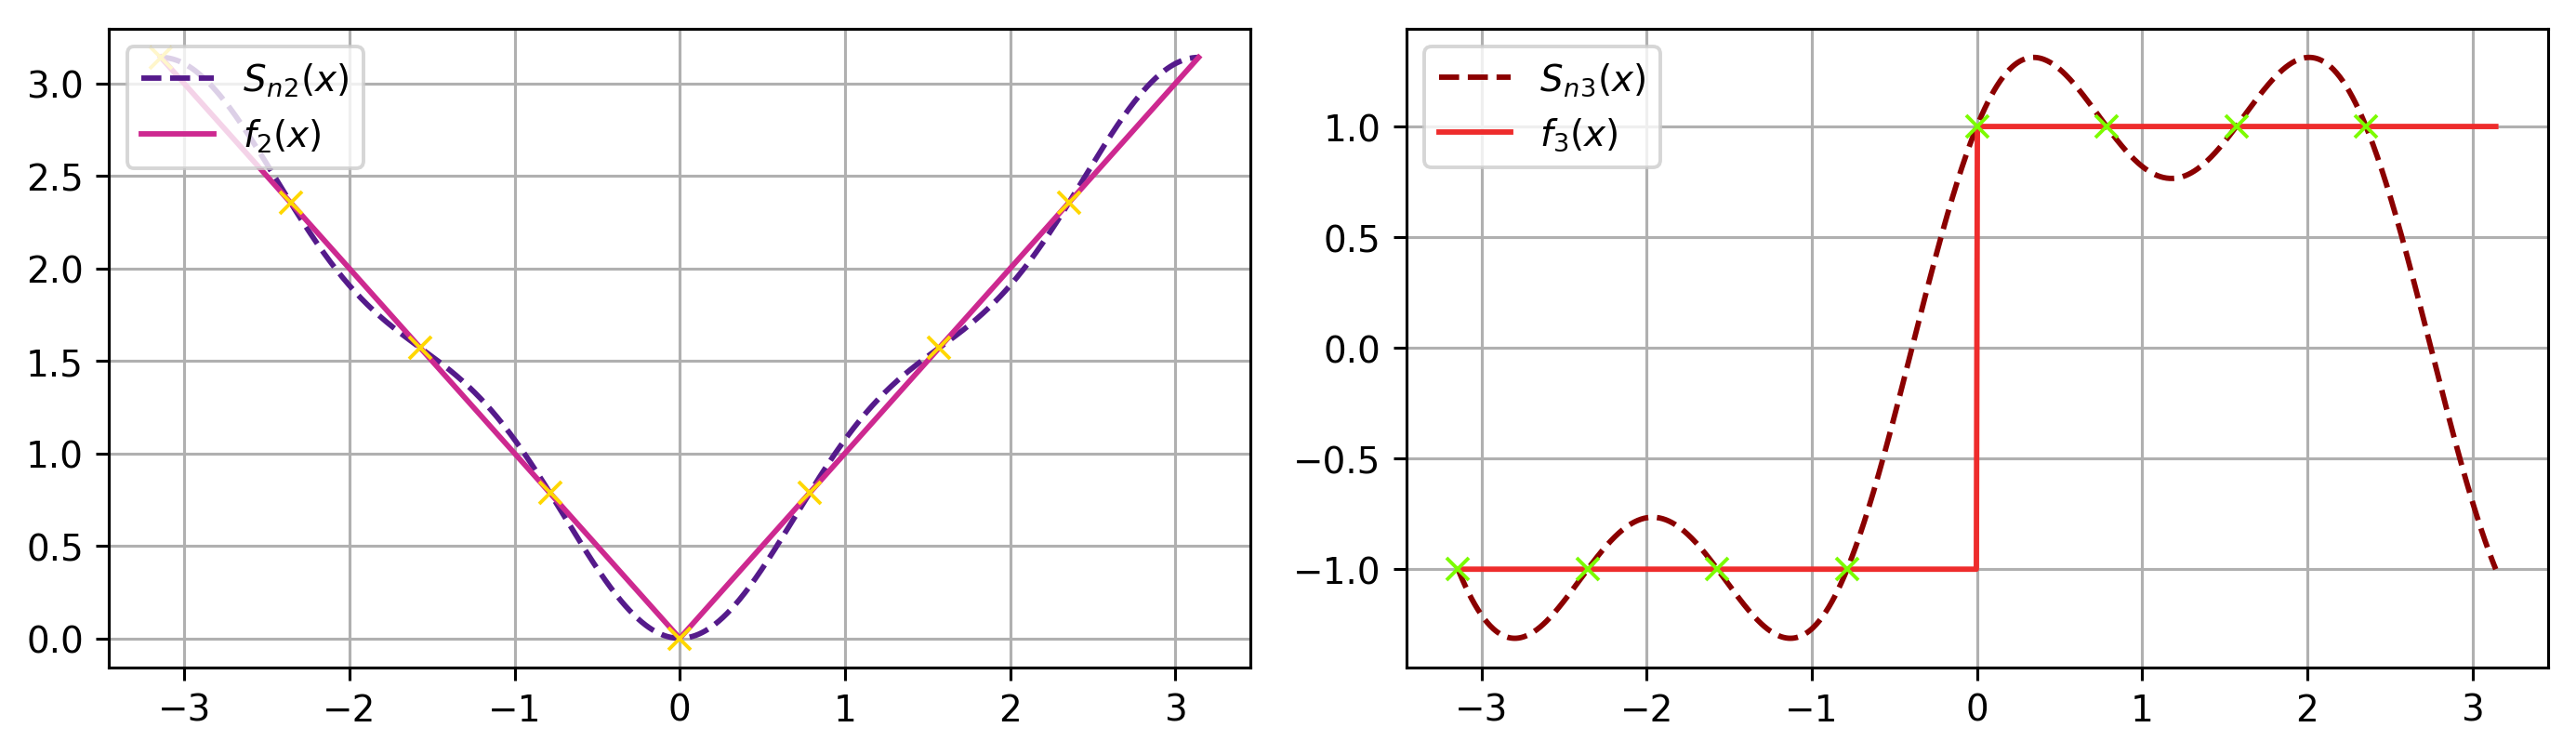

In [18]:
'''
Вывод
'''
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), dpi=280)
axes[0].plot(vector_x, S_2_x, "--", color="#551A8B", label="$S{_n}_2(x)$")
axes[0].plot(vector_x, f_2_x, "-", color="#CD2990", label="$f{_2}(x)$")
axes[0].plot(x_nodes, y_nodes_2, 'x', color="#FFD700")
axes[0].legend(loc='upper left');
axes[0].grid()
axes[1].plot(vector_x, S_3_x, "--", color="darkred", label="$S{_n}_3(x)$")
axes[1].plot(vector_x, f_3_x, "-", color="#EE2C2C", label="$f{_3}(x)$")
axes[1].plot(x_nodes, y_nodes_3, 'x', color="#7cfc00")
axes[1].legend(loc='upper left');
axes[1].grid()
fig.tight_layout()
plt.show()
#fig.savefig("fast_Fourier_transform_S_n_%d.png" % n)